In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/click-bait-title-classification/clickbait_title_classification.csv


# Data Loading

In [49]:
df=pd.read_csv('/kaggle/input/click-bait-title-classification/clickbait_title_classification.csv')
df

,title,clickbait
0,""".asia"" domain applications near 300,000 on op...",0
1,"""1 Indian + 1 Indian = Unrelatable"": Televisio...",1
2,"""7th Heaven"" television series comes to an end",0
3,"""Arm Glow"" Is Your New Life Goal, Thanks To Lu...",1
4,"""Beans Memes"" Is The Only Twitter Account That...",1
...,...,...
31995,"Íngrid Betancourt and others rescued, says Col...",0
31996,Íngrid Betancourt returns to France,0
31997,‘Twin Towers’ warship set to enter New York,0
31998,"“Dr Death” Steve Williams, American profession...",0


# Text to vector for model fitting

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

print(df['clickbait'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    df['title'], df['clickbait'], test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


clickbait
0    16001
1    15999
Name: count, dtype: int64
Accuracy: 0.95265625
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3193
           1       0.96      0.94      0.95      3207

    accuracy                           0.95      6400
   macro avg       0.95      0.95      0.95      6400
weighted avg       0.95      0.95      0.95      6400



# Box-plot

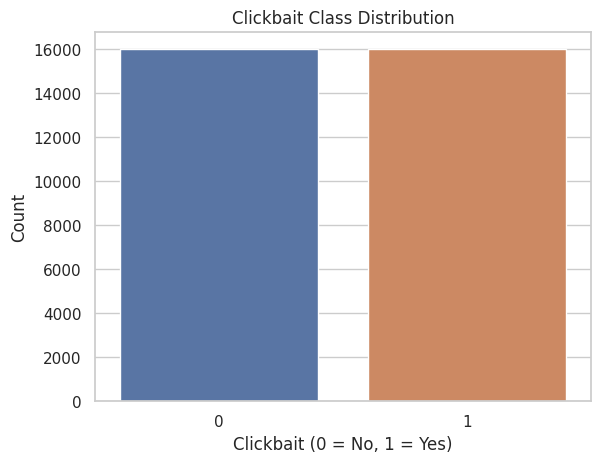

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='clickbait', data=df)
plt.title("Clickbait Class Distribution")
plt.xlabel("Clickbait (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


# Confusion Matrix

Confusion matrix:
 [[3085  108]
 [ 206 3001]]


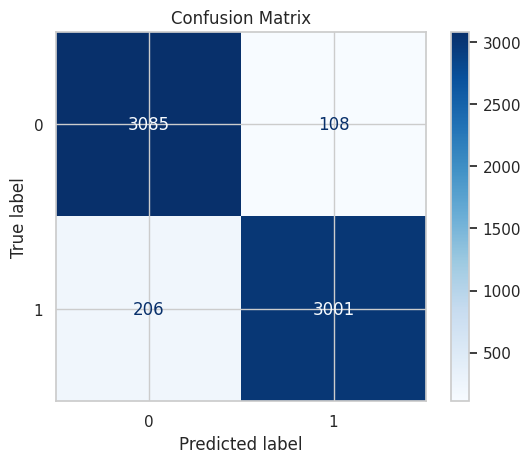

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n {cm}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Length vs Clickbait Classification

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

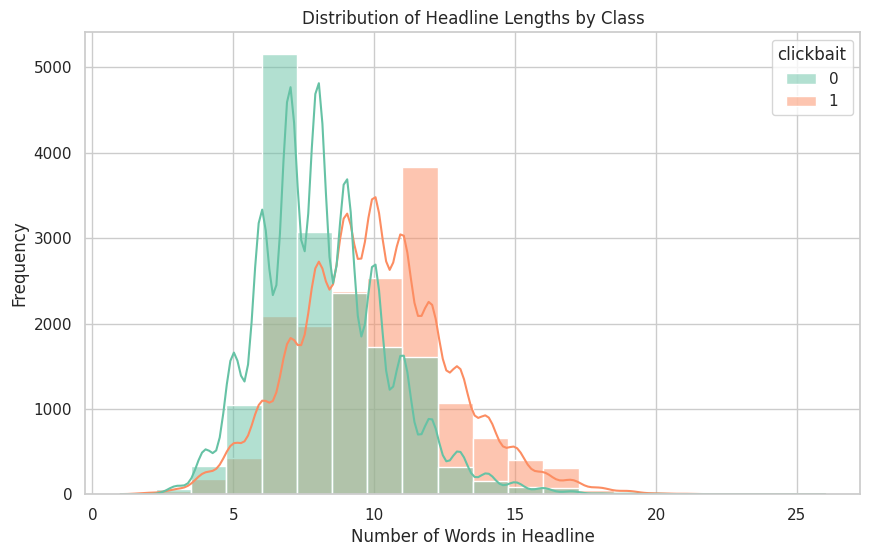

In [53]:
import seaborn as sns

df['length'] = df['title'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='length', hue='clickbait', bins=20, kde=True, palette='Set2')
plt.title("Distribution of Headline Lengths by Class")
plt.xlabel("Number of Words in Headline")
plt.ylabel("Frequency")
plt.show()


As expected longer length is more suspected to be Clickbait 